In [10]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch.utils import data as data_utils
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data 
df = pd.read_csv('/home/stefan/stef/Disk/Projects/SkillTask2/data/train.csv/train.csv')

In [3]:
# Create copy of a dataframe
data = df.copy()

In [4]:
data.head()

,sample_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
0,sample_0,25.609375,6.703125,3.652344,10.039062,169.375,102.8125,1.422852,6.722656,8.015625,...,8.070312,4.363281,5.019531,5.710938,6.343750,6.843750,7.289062,7.617188,7.980469,1.0
1,sample_1,18.343750,5.824219,2.966797,4.902344,164.625,71.8125,1.357422,5.894531,2.753906,...,7.359375,4.195312,4.808594,5.425781,5.949219,6.339844,6.730469,7.074219,7.175781,1.0
2,sample_2,28.562500,6.230469,3.583984,7.882812,159.500,113.1875,1.696289,6.316406,4.605469,...,8.562500,4.523438,5.097656,5.789062,6.457031,6.871094,7.386719,7.878906,8.328125,1.0
3,sample_3,28.062500,6.132812,2.726562,6.378906,169.750,111.0000,1.535156,6.199219,3.712891,...,4.558594,3.533203,3.900391,4.261719,4.042969,3.869141,3.890625,4.042969,4.273438,1.0
4,sample_4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,...,6.613281,4.625000,4.996094,5.328125,5.593750,5.800781,6.027344,6.242188,6.449219,0.0


In [6]:
# Replace inf values with np.nan, then replace nan with 0
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data = data.fillna(0) # Check mean

In [7]:
# Features
X = data.drop(['sample_id', 'y'], axis=1)
# Labels
y = data['y']

In [13]:
# Features normalization
features_norm = StandardScaler() 
X_std = features_norm.fit_transform(X) 


In [14]:
# Split data in train/test
X_train, x_test, Y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [15]:
# To torch tensor: Train
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.values).flatten() 

# Test
x_test_tensor = torch.tensor(x_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values).flatten() 

In [16]:
# Create train dataset
batch_size = 256

train_dataset = data_utils.TensorDataset(X_train_tensor, Y_train_tensor) 
train_loader = data_utils.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

In [17]:
for data, labels in train_loader:
    print(data.size())
    print(labels.size())
    break

torch.Size([256, 1612])
torch.Size([256])


In [18]:
X_train_tensor.size()

torch.Size([876, 1612])

In [19]:
len(train_loader)

4

In [128]:
128*6

768

In [148]:
import torch.nn.functional as F
#our class must extend nn.Module
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(1612,3200)
        self.fc2 = nn.Linear(3200,3200)
        self.fc3 = nn.Linear(3200,3200)
        self.fc4 = nn.Linear(3200,1600)
        
        self.dropout = nn.Dropout(p=0.5)
        #This applies linear transformation to produce output data
        self.fc5 = nn.Linear(1600,1)
        
        self.bn0 = nn.BatchNorm1d(1612)
        self.bn1 = nn.BatchNorm1d(3200)
        self.bn2 = nn.BatchNorm1d(3200)
        self.bn3 = nn.BatchNorm1d(3200)
        self.bn4 = nn.BatchNorm1d(1600)
        
        
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.bn0(x)
        x = F.relu(self.fc1(x))
        
        x = self.bn1(x)
        x = F.tanh(self.fc2(x))
        
        x = self.bn2(x)
        x = self.dropout(x)     
        x = F.relu(self.fc3(x))
        
        x = self.bn3(x)
        x = self.dropout(x)  
        x = F.relu(self.fc4(x))
        
        x = self.fc5(x)
        
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self, x):
        with torch.no_grad():
            y_pred = model(x)
            y_pred_tag = torch.round(torch.sigmoid(y_pred))

    
        return torch.tensor(y_pred_tag, dtype=float)

In [213]:
import torch.nn.functional as F
#our class must extend nn.Module
class MyClassifierSecond(nn.Module):
    def __init__(self):
        super(MyClassifierSecond,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(1612,800)
        self.fc2 = nn.Linear(800,200)
        self.layer_out = nn.Linear(200,1)
        
        self.dropout = nn.Dropout(p=0.1)
        #This applies linear transformation to produce output data
        
        
        self.bn0 = nn.BatchNorm1d(1612)
        self.bn1 = nn.BatchNorm1d(800)
        self.bn2 = nn.BatchNorm1d(400)
        self.bn_out = nn.BatchNorm1d(200)
        
        
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.bn0(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x) 
        
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        
       
        x = self.bn_out(x)         
        x = self.layer_out(x)
        
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self, x):
        with torch.no_grad():
            y_pred = model(x)
            y_pred_tag = torch.round(torch.sigmoid(y_pred))

    
        return torch.tensor(y_pred_tag, dtype=float)

In [222]:
#Initialize the model        
model = MyClassifierSecond()
#Define loss criterion
criterion = nn.BCEWithLogitsLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [223]:
model

MyClassifierSecond(
  (fc1): Linear(in_features=1612, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=200, bias=True)
  (layer_out): Linear(in_features=200, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (bn0): BatchNorm1d(1612, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_out): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [224]:
def train_model(model, optim, criterion, train_dl):
    model.train()
    total = 0
    sum_loss = 0
    for x, y in train_dl:
        batch = y.shape[0]
        output = model(x)
        # output = F.softmax(output, dim=0)       
        loss = criterion(output, y.unsqueeze(1))   
        optim.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optim.step()
        total += batch
        sum_loss += batch*(loss.item())
        # print("Batch loss: ", batch*(loss.item()))
    return sum_loss/total

In [225]:
#Number of epochs
epochs = 500
#List to store losses
losses = []
for i in range(epochs):
    epoch_loss = train_model(model=model, optim=optimizer, criterion=criterion, train_dl=train_loader)
    losses.append(epoch_loss)
    if i % 10 == 0:
        print("Epoch {0}, Loss {1}".format(i+1, epoch_loss))

Epoch 1, Loss 0.9243452419685753
Epoch 11, Loss 0.15776427462776935
Epoch 21, Loss 0.07369973273727531
Epoch 31, Loss 0.030707612186408915
Epoch 41, Loss 0.021387442969100626
Epoch 51, Loss 0.0259090316950162
Epoch 61, Loss 0.01229165805017154
Epoch 71, Loss 0.008375804739125692
Epoch 81, Loss 0.005519446579092453
Epoch 91, Loss 0.01406173242165165
Epoch 101, Loss 0.009605087890576588
Epoch 111, Loss 0.002867461197201396
Epoch 121, Loss 0.006560417974389859
Epoch 131, Loss 0.0030086146224558453
Epoch 141, Loss 0.0021964803221500126
Epoch 151, Loss 0.010981377876710796
Epoch 161, Loss 0.0032133167282949442
Epoch 171, Loss 0.008608913816045607
Epoch 181, Loss 0.0017178328715152112
Epoch 191, Loss 0.0007254079463913438
Epoch 201, Loss 0.002269058323930099
Epoch 211, Loss 0.006773565283375724
Epoch 221, Loss 0.0020521640010875064
Epoch 231, Loss 0.0016255472283514293
Epoch 241, Loss 0.014469964455835418
Epoch 251, Loss 0.006433949999280397
Epoch 261, Loss 0.00612255999342936
Epoch 271, Los

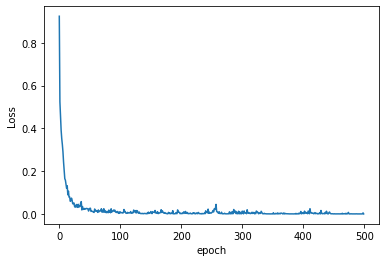

In [226]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [227]:
from sklearn import metrics
y_preds = model.predict(x_test_tensor)

print(metrics.classification_report(y_test_tensor.long(), y_preds))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        82
           1       0.84      0.85      0.85       137

    accuracy                           0.81       219
   macro avg       0.80      0.79      0.79       219
weighted avg       0.81      0.81      0.81       219



<ipython-input-213-218269466e6b>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(y_pred_tag, dtype=float)


In [228]:
from sklearn.metrics import roc_auc_score

In [229]:
roc_auc_score(y_test_tensor.long(), model.predict(x_test_tensor))

<ipython-input-213-218269466e6b>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(y_pred_tag, dtype=float)


0.790413031867545